In [1]:
from pyspark import SparkContext

# Start the spark context
sc = SparkContext.getOrCreate(conf=swan_spark_conf) 

21/08/13 15:10:43 WARN Utils: Your hostname, DESKTOP-M8PQ28M resolves to a loopback address: 127.0.1.1; using 192.168.86.205 instead (on interface wifi0)
21/08/13 15:10:43 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
21/08/13 15:10:44 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
INFO:SparkMonitorKernel:Client Connected ('127.0.0.1', 56142)


In [2]:
'''
Project 1
'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

# a nice way of filtering out deprecated warnings
import warnings
warnings.filterwarnings("ignore")

# start a spark session (from spark tutrial)
from pyspark.sql import SparkSession
import warnings
warnings.filterwarnings("ignore")

# create a spark session (which will run spark jobs)
spark = SparkSession.builder.getOrCreate()

In [3]:
# make it look nice
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)

In [4]:
# make fast
spark.conf.set('spark.sql.execution.arrow.pyspark.enabled', True)

In [5]:
# schema
import pyspark.sql.functions as F
from pyspark.sql.types import *
from pyspark.sql.functions import col


feb_yellow_sdf = spark.read.csv('../Proj1data/yellow_tripdata_2019-02.csv', header=True)

ints = ('VendorID', 'passenger_count', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type',)
doubles = ('trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 
           'improvement_surcharge', 'total_amount', 'congestion_surcharge')
strings = ('store_and_fwd_flag', )
dtimes = ('tpep_pickup_datetime', 'tpep_dropoff_datetime', )

dtypes = {column: IntegerType() for column in ints}
dtypes.update({column: DoubleType() for column in doubles})
dtypes.update({column: StringType() for column in strings})
dtypes.update({column: TimestampType() for column in dtimes})
schema = StructType()

for column in feb_yellow_sdf.columns:
    schema.add(column, # column name
               dtypes[column], # data type
               True # is nullable?
              )

In [6]:
# read data staight into spark dataframe
jan_yellow_sdf = spark.read.csv('../Proj1data/yellow_tripdata_2019-01.csv', header=True, schema=schema)
feb_yellow_sdf = spark.read.csv('../Proj1data/yellow_tripdata_2019-02.csv', header=True, schema=schema)
mar_yellow_sdf = spark.read.csv('../Proj1data/yellow_tripdata_2019-03.csv', header=True, schema=schema)
apr_yellow_sdf = spark.read.csv('../Proj1data/yellow_tripdata_2019-04.csv', header=True, schema=schema)
may_yellow_sdf = spark.read.csv('../Proj1data/yellow_tripdata_2019-05.csv', header=True, schema=schema)
jun_yellow_sdf = spark.read.csv('../Proj1data/yellow_tripdata_2019-06.csv', header=True, schema=schema)
jul_yellow_sdf = spark.read.csv('../Proj1data/yellow_tripdata_2019-07.csv', header=True, schema=schema)
aug_yellow_sdf = spark.read.csv('../Proj1data/yellow_tripdata_2019-08.csv', header=True, schema=schema)
sep_yellow_sdf = spark.read.csv('../Proj1data/yellow_tripdata_2019-09.csv', header=True, schema=schema)
oct_yellow_sdf = spark.read.csv('../Proj1data/yellow_tripdata_2019-10.csv', header=True, schema=schema)
nov_yellow_sdf = spark.read.csv('../Proj1data/yellow_tripdata_2019-11.csv', header=True, schema=schema)
dec_yellow_sdf = spark.read.csv('../Proj1data/yellow_tripdata_2019-12.csv', header=True, schema=schema)


# feb_green = spark.read.csv("data/green_tripdata_2019-02.csv", header=True)
# mar_green = spark.read.csv("data/green_tripdata_2019-03.csv", header=True)
# apr_green = spark.read.csv("data/green_tripdata_2019-04.csv", header=True)

# feb_fhv = spark.read.csv("data/fhv_tripdata_2019-02.csv", header=True)
# mar_fhv = spark.read.csv("data/fhv_tripdata_2019-03.csv", header=True)
# apr_fhv = spark.read.csv("data/fhv_tripdata_2019-04.csv", header=True)

# feb_fhvhv = spark.read.csv("data/fhvhv_tripdata_2019-02.csv", header=True)
# mar_fhvhv = spark.read.csv("data/fhvhv_tripdata_2019-03.csv", header=True)
# apr_fhvhv = spark.read.csv("data/fhvhv_tripdata_2019-04.csv", header=True)



In [7]:
# combine dataframes
yellow_data_2019 = jan_yellow_sdf.union(feb_yellow_sdf).union(mar_yellow_sdf).union(apr_yellow_sdf).union(may_yellow_sdf).union(jun_yellow_sdf).union(jul_yellow_sdf).union(aug_yellow_sdf).union(sep_yellow_sdf).union(oct_yellow_sdf).union(nov_yellow_sdf).union(dec_yellow_sdf)
# print(yellow_data_2019.count())
yellow_data_2019.printSchema()

del jan_yellow_sdf
del feb_yellow_sdf
del mar_yellow_sdf
del apr_yellow_sdf
del may_yellow_sdf
del jun_yellow_sdf
del jul_yellow_sdf
del aug_yellow_sdf
del sep_yellow_sdf
del oct_yellow_sdf
del nov_yellow_sdf
del dec_yellow_sdf

# yellow_data_2019.limit(100)
# green_data = feb_green.union(mar_green).union(apr_green)

# fhv_data = feb_fhv.union(mar_fhv).union(apr_fhv)

# fhvhv_data = feb_fhvhv.union(mar_fhvhv).union(apr_fhvhv)

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: integer (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)



In [8]:
# Engineer features trip time and max temperature
'''
https://www.andyupton.net/blog/2019/6/12/feature-engineering-with-pyspark
'''
## Feature engineering
from pyspark.sql.functions import lit
from pyspark.sql.functions import to_date, dayofweek
from pyspark.sql.functions import unix_timestamp

yellow_data_2019_wtemp_and_time = yellow_data_2019.withColumn('trip_time', unix_timestamp("tpep_dropoff_datetime") - unix_timestamp('tpep_pickup_datetime'))

# get max temperature for the day
max_temperatures_sdf = spark.read.csv('../Proj1data/maxTemperaturesNYC.csv', header=True)
# max_temperatures_sdf.select(to_date(max_temperatures_sdf.date).alias('date'))

max_temperatures_sdf = max_temperatures_sdf.withColumn('date', to_date(max_temperatures_sdf['date']))

print(max_temperatures_sdf.schema)

# new_df = df1.join(df2, on=['field_B', 'field_C', 'field_D'], how='left_outer')

# add column to yellow data
# yellow_data_2019_w_temp = yellow_data_2019.withColumn('max_temp', when(yellow_data_2019.date, dic[date]))
yellow_data_2019_wtemp_and_time = yellow_data_2019_wtemp_and_time.withColumn('date', to_date(yellow_data_2019_wtemp_and_time.tpep_pickup_datetime))

yellow_data_2019_wtemp_and_time = yellow_data_2019_wtemp_and_time.join(max_temperatures_sdf, on=['date'], how='left_outer')



StructType(List(StructField(date,DateType,true),StructField(maxTemp,StringType,true)))


In [9]:
# change trip time to int for efficiency
yellow_data_2019_wtemp_and_time = yellow_data_2019_wtemp_and_time.withColumn('trip_time', yellow_data_2019_wtemp_and_time.trip_time.cast('int'))
yellow_data_2019_wtemp_and_time.schema

StructType(List(StructField(date,DateType,true),StructField(VendorID,IntegerType,true),StructField(tpep_pickup_datetime,TimestampType,true),StructField(tpep_dropoff_datetime,TimestampType,true),StructField(passenger_count,IntegerType,true),StructField(trip_distance,DoubleType,true),StructField(RatecodeID,IntegerType,true),StructField(store_and_fwd_flag,StringType,true),StructField(PULocationID,IntegerType,true),StructField(DOLocationID,IntegerType,true),StructField(payment_type,IntegerType,true),StructField(fare_amount,DoubleType,true),StructField(extra,DoubleType,true),StructField(mta_tax,DoubleType,true),StructField(tip_amount,DoubleType,true),StructField(tolls_amount,DoubleType,true),StructField(improvement_surcharge,DoubleType,true),StructField(total_amount,DoubleType,true),StructField(congestion_surcharge,DoubleType,true),StructField(trip_time,IntegerType,true),StructField(maxTemp,StringType,true)))

In [ ]:
# DECRIPTIVE 
# sql describe
# import pyspark.sql.functions as F

# from pyspark.sql.functions import col
# from pyspark.sql.types import *

# yellow_data_2019.summary

In [16]:

# sample the data for plotting
sample = yellow_data_2019_wtemp_and_time.sample(0.01, seed=50)
sample.limit(5)

y = [val.total_amount for val in sample.select('total_amount').collect()]
x_ts = [val.trip_distance for val in sample.select('trip_distance').collect()]

'\nFrom the scatterplot we can see what data we may want to get rid of.\n - free trips\n - 0 > trip > 100km\n - 0 > cost > 600\n - payment type must be crash or credit (1 or 2)\n - \nData seems to follow a linear relationship, however variance increases slightly as trip distance increases.\n'

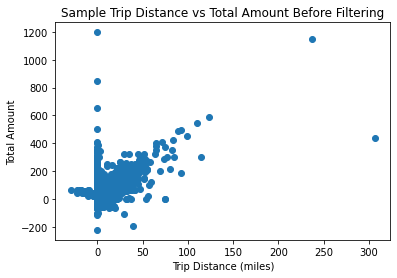

In [17]:
# plot the sample
plt.title('Sample Trip Distance vs Total Amount Before Filtering')
plt.scatter(x_ts, y)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Total Amount')
plt.savefig('Plots/Trip Distance vs Total Amount Before Filtering.png')


'''
From the scatterplot we can see what data we may want to get rid of.
 - free trips
 - 0 > trip > 100km
 - 0 > cost > 600
 - payment type must be crash or credit (1 or 2)
 - 
Data seems to follow a linear relationship, however variance increases slightly as trip distance increases.
'''

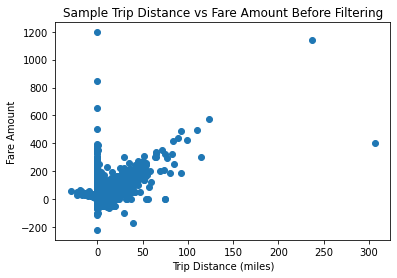

In [18]:
# lets also plot fare amount
y = [val.fare_amount for val in sample.select('fare_amount').collect()]
# x_ts = [val.trip_distance for val in sample.select('trip_distance').collect()]

plt.title('Sample Trip Distance vs Fare Amount Before Filtering')
plt.scatter(x_ts, y)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount')
plt.savefig('Plots/Trip Distance vs Fare Amount Before Filtering.png')

In [19]:
# plot trip time with fare amount
# y = [val.fare_amount for val in sample.select('fare_amount').collect()]
x_ts = [val.trip_time/60 for val in sample.select('trip_time').collect()]

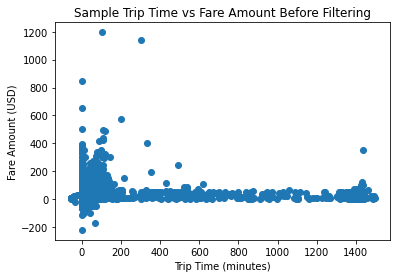

In [20]:
plt.title('Sample Trip Time vs Fare Amount Before Filtering')
plt.scatter(x_ts, y)
plt.xlabel('Trip Time (minutes)')
plt.ylabel('Fare Amount (USD)')
plt.savefig('Plots/Trip Time vs Fare Amount Before Filtering.png')

In [22]:
# same without changing to minutes
x_ts = [val.trip_time for val in sample.select('trip_time').collect()]
plt.title('Sample Trip Time vs Fare Amount Before Filtering')
plt.scatter(x_ts, y)
plt.xlabel('Trip Time (seconds)')
plt.ylabel('Fare Amount (USD)')
plt.savefig('Plots/Trip Time (seconds) vs Fare Amount Before Filtering.png')

KeyboardInterrupt: 

In [10]:
# filter data using filter

# filter fare amount to be between 0 and 600
yellow_data_2019_wtemp_and_time = yellow_data_2019_wtemp_and_time.filter(yellow_data_2019_wtemp_and_time.fare_amount > 0) 
yellow_data_2019_wtemp_and_time = yellow_data_2019_wtemp_and_time.filter(yellow_data_2019_wtemp_and_time.fare_amount < 200)
# filter trip distance to be between 0 and 150
yellow_data_2019_wtemp_and_time = yellow_data_2019_wtemp_and_time.filter(yellow_data_2019_wtemp_and_time.trip_distance > 0)
yellow_data_2019_wtemp_and_time = yellow_data_2019_wtemp_and_time.filter(yellow_data_2019_wtemp_and_time.trip_distance < 150)
# filter payment type to be cash or card only
yellow_data_2019_wtemp_and_time = yellow_data_2019_wtemp_and_time.filter(yellow_data_2019_wtemp_and_time.payment_type != 3)
yellow_data_2019_wtemp_and_time = yellow_data_2019_wtemp_and_time.filter(yellow_data_2019_wtemp_and_time.payment_type != 4)
yellow_data_2019_wtemp_and_time = yellow_data_2019_wtemp_and_time.filter(yellow_data_2019_wtemp_and_time.payment_type != 5)
yellow_data_2019_wtemp_and_time = yellow_data_2019_wtemp_and_time.filter(yellow_data_2019_wtemp_and_time.payment_type != 6)
# filter so rate code must be standard rate
yellow_data_2019_wtemp_and_time = yellow_data_2019_wtemp_and_time.filter(yellow_data_2019_wtemp_and_time.RatecodeID == 1)

# There also seem to be some dates that are in 2018 instead of 2019. 
# filter so only 2019 pickup allowed
# yellow_data_2019_wtemp_and_time = yellow_data_2019_wtemp_and_time.filter(yellow_data_2019_wtemp_and_time.date >= \
#                                                                          datetime.datetime.timestamp("2019-01-01"))



# yellow_data_2019.count()
                                 

In [11]:
yellow_data_2019_wtemp_and_time = yellow_data_2019_wtemp_and_time.filter(yellow_data_2019_wtemp_and_time.maxTemp.isNotNull())

In [22]:
yellow_data_2019_wtemp_and_time.limit(5)

date,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_time,maxTemp
2019-01-01,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,null,400,57.92
2019-01-01,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.0,0.0,0.3,16.3,null,1152,57.92
2019-01-01,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.3,1,N,163,229,1,6.5,0.5,0.5,1.25,0.0,0.3,9.05,null,429,57.92
2019-01-01,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.7,1,N,229,7,1,13.5,0.5,0.5,3.7,0.0,0.3,18.5,null,818,57.92
2019-01-01,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.1,1,N,141,234,1,10.0,0.5,0.5,1.7,0.0,0.3,13.0,null,720,57.92


In [11]:
# lets plot another sample to see the difference
sample = yellow_data_2019_wtemp_and_time.sample(0.01, seed=50)
# sample.limit(5)

'\nAfter researching, the JFK fare is just $52.\nThe standard fare is "Plus 50 cents per 1/5 mile when traveling above 12mph or per 60 seconds in slow traffic or when the vehicle is stopped."\n\n'

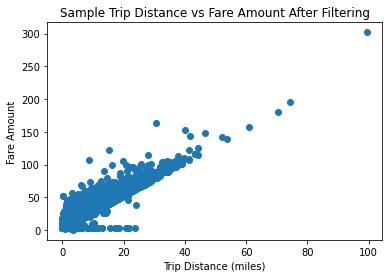

In [12]:
# plot after filtering
y = [val.fare_amount for val in sample.select('fare_amount').collect()]
x_ts = [val.trip_distance for val in sample.select('trip_distance').collect()]

plt.scatter(x_ts, y)
plt.title('Sample Trip Distance vs Fare Amount After Filtering')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount')
plt.savefig('Plots/Trip Distance vs Fare Amount After Filtering.png')

'''
still seems to be many trips around $50, and many trips around $0
There also seems to be a line around y=x/5
'''
'''
After researching, the JFK fare is just $52.
The standard fare is "Plus 50 cents per 1/5 mile when traveling above 12mph or per 60 seconds in slow traffic or when the vehicle is stopped."
'''

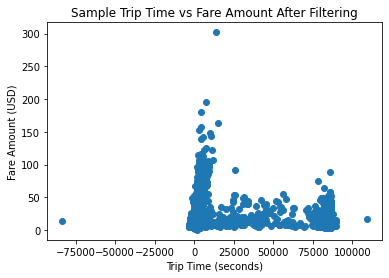

In [13]:
# plot trip time after filtering
x_ts = [val.trip_time for val in sample.select('trip_time').collect()]
plt.title('Sample Trip Time vs Fare Amount After Filtering')
plt.scatter(x_ts, y)
plt.xlabel('Trip Time (seconds)')
plt.ylabel('Fare Amount (USD)')
plt.savefig('Plots/Trip Time (seconds) vs Fare Amount After Filtering.png')

In [12]:
# filter trip time
# no trips an be > 2 hours
yellow_data_2019_wtemp_and_time = yellow_data_2019_wtemp_and_time.filter(yellow_data_2019_wtemp_and_time.trip_time > 0)
yellow_data_2019_wtemp_and_time = yellow_data_2019_wtemp_and_time.filter(yellow_data_2019_wtemp_and_time.trip_time < 7200)

In [24]:
yellow_data_2019_wtemp_and_time.limit(5)

date,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_time,maxTemp
2019-01-01,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,null,400,57.92
2019-01-01,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.0,0.0,0.3,16.3,null,1152,57.92
2019-01-01,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.3,1,N,163,229,1,6.5,0.5,0.5,1.25,0.0,0.3,9.05,null,429,57.92
2019-01-01,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.7,1,N,229,7,1,13.5,0.5,0.5,3.7,0.0,0.3,18.5,null,818,57.92
2019-01-01,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.1,1,N,141,234,1,10.0,0.5,0.5,1.7,0.0,0.3,13.0,null,720,57.92


In [13]:
# convert temperatures to celcius
# change trip time to int for efficiency
yellow_data_2019_wtemp_and_time = yellow_data_2019_wtemp_and_time.withColumn('maxTemp', (yellow_data_2019_wtemp_and_time['maxTemp'] - 32)*5/9)


In [26]:
yellow_data_2019_wtemp_and_time.limit(5)

date,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_time,maxTemp
2019-01-01,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,null,400,14.400000000000002
2019-01-01,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.0,0.0,0.3,16.3,null,1152,14.400000000000002
2019-01-01,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.3,1,N,163,229,1,6.5,0.5,0.5,1.25,0.0,0.3,9.05,null,429,14.400000000000002
2019-01-01,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.7,1,N,229,7,1,13.5,0.5,0.5,3.7,0.0,0.3,18.5,null,818,14.400000000000002
2019-01-01,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.1,1,N,141,234,1,10.0,0.5,0.5,1.7,0.0,0.3,13.0,null,720,14.400000000000002


In [14]:
# from spark tutorial

from pyspark.sql.functions import mean, count

# calculate mean of each tempterature
dates = yellow_data_2019_wtemp_and_time.groupBy("date").agg(mean("total_amount").alias("Average_Trip_Amount_USD"),
         mean("trip_distance").alias("Average_Distance_in_Miles"), mean("trip_time").alias("Average_Time_in_Seconds"), count("date").alias("Trip_Frequency"))

In [15]:
dates = dates.join(max_temperatures_sdf, on=['date'], how='left_outer')


In [46]:
dates_freq = [val.Trip_Frequency for val in dates.select('Trip_Frequency').collect()]

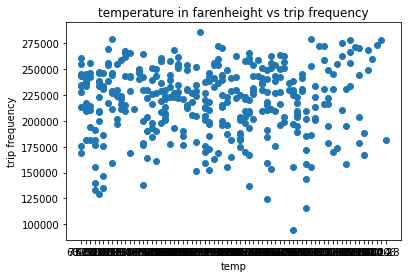

In [48]:
plt.title('temperature in farenheight vs trip frequency')
plt.scatter(x_ts, dates_freq)
plt.xlabel('temp')
plt.ylabel('trip frequency')
plt.savefig('Plots/temp vs trip frequency on a given day.png')

In [ ]:
dates_avg_amount = [val.Average_Trip_Amount_USD for val in dates.select('Average_Trip_Amount_USD').collect()]

In [35]:
x_ts = [val.maxTemp for val in dates.select('maxTemp').collect()]

In [ ]:
date_temps = x_ts

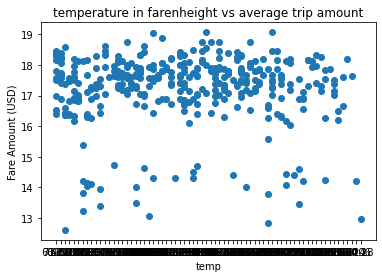

In [36]:
plt.title('temperature in farenheight vs average trip amount')
plt.scatter(x_ts, y)
plt.xlabel('temp')
plt.ylabel('average Fare Amount (USD)')
plt.savefig('Plots/temp vs fare amount.png')

In [37]:
y = [val.Average_Time_in_Seconds for val in dates.select('Average_Time_in_Seconds').collect()]

In [ ]:
date_avg_time = y

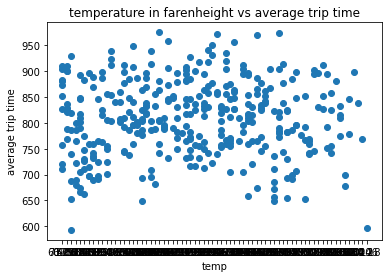

In [38]:
plt.title('temperature in farenheight vs average trip time')
plt.scatter(x_ts, y)
plt.xlabel('temp')
plt.ylabel('average trip time')
plt.savefig('Plots/temp vs trip time.png')

In [16]:
## calculate means for each area code
areas = yellow_data_2019_wtemp_and_time.groupBy("PULocationID").agg(mean("total_amount").alias("Average_Trip_Amount_USD"),
                                                                    mean("fare_amount").alias("Average_fare_amount"), 
                                                                    mean("trip_distance").alias("Average_Distance_in_Miles"), 
                                                                    mean("trip_time").alias("Average_Time_in_Seconds"), 
                                                                    count("date").alias("Trip_Frequency"))

In [17]:
areas_avg_trip_amount = [val.Average_Trip_Amount_USD for val in areas.select('Average_Trip_Amount_USD').collect()]

In [18]:
areas_freq = [val.Trip_Frequency for val in areas.select('Trip_Frequency').collect()]

In [19]:
areas_avg_trip_time = [val.Average_Time_in_Seconds for val in areas.select('Average_Time_in_Seconds').collect()]

In [20]:
area_codes = [val.PULocationID for val in areas.select('PULocationID').collect()]

In [21]:
areas_avg_fare_amount = [val.Average_fare_Amount for val in areas.select('Average_fare_Amount').collect()]

In [22]:
areas_avg_trip_distance = [val.Average_Distance_in_Miles for val in areas.select('Average_Distance_in_Miles').collect()]

In [28]:
areas_dic = {"area_codes": area_codes, "avg_trip_time": areas_avg_trip_time, "avg_trip_distance": areas_avg_trip_amount, 
             "freq": areas_freq, "avg_fare_amount": areas_avg_fare_amount, "avg_trip_amount": areas_avg_trip_amount}
areas_df = pd.DataFrame(areas_dic)
areas_df
areas_df.to_csv("../Proj1data/AreaCodeAverages.csv")

In [17]:
# # # read yellow data
# # # jan_yellow = pd.read_csv("data/yellow_tripdata_2019-01.csv")
# feb_yellow = pd.read_csv("../Proj1data/yellow_tripdata_2019-02.csv")
# mar_yellow = pd.read_csv("../Proj1data/yellow_tripdata_2019-03.csv")
# apr_yellow = pd.read_csv("../Proj1data/yellow_tripdata_2019-04.csv")
# yellow_pd = pd.concat([feb_yellow, mar_yellow, apr_yellow])

In [21]:
## SHAPEFILE (from lab 2)
import geopandas as gpd

# sf stands for shape file
sf = gpd.read_file("../Proj1data/taxi_zones/taxi_zones.shp")
zone = pd.read_csv("../Proj1data/taxi_zones/taxi+_zone_lookup.csv")

# Convert the geometry shaape to to latitude and longitude
# Please attribute this if you are using it
sf['geometry'] = sf['geometry'].to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

In [ ]:
gdf = gpd.GeoDataFrame(pd.merge(yellow_pd, sf, left_on='PULocationID', right_on='LocationID')).drop('PULocationID',axis=1)
gdf.sample(2)

In [ ]:
geoJSON = gdf[['LocationID','geometry']].drop_duplicates('LocationID').to_json()

In [ ]:
m = folium.Map(location=[40.66, -73.94], tiles="Stamen Terrain", zoom_start=10)

# refer to the folium documentations on how to plot aggregated data.
m.add_child(folium.Choropleth(geo_data=geoJSON, name='choropleth'))

m.save('plots/foliumChoroplethMap.html')
m

In [ ]:
m_trip_distance = folium.Map(location=[40.66, -73.94], tiles="Stamen Terrain", zoom_start=10)

# refer to the folium documentations on more information on how to plot aggregated data.
folium.Choropleth(
    geo_data=geoJSON, # geoJSON 
    name='choropleth', # name of plot
    data=gdf, # data source
    columns=['LocationID','total_amount'], # the columns required
    key_on='properties.LocationID', # this is from the geoJSON's properties
    fill_color='OrRd', # color scheme
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Trips' # legend title
).add_to(m_trip_distance)

m_trip_distance.save('../plots/foliumChoroplethMapTrips.html')
m_trip_distance